In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
data1=pd.read_csv(r'Task2train.csv')

In [6]:
data1.shape

(891, 12)

In [7]:
data2=pd.read_csv(r'Task2test.csv')

In [8]:
data2.shape

(418, 11)

In [9]:
data=data1.append(data2)

C:\Users\madhu\AppData\Local\Temp\ipykernel_11188\2617308332.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data1.append(data2)


In [11]:
data.shape

(1309, 12)

In [33]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


# Data Cleaning

## Handling missing values

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
data1['Age'].fillna(data1['Age'].median(), inplace=True)
data1['Embarked'].fillna(data1['Embarked'].mode()[0], inplace=True)
data1['Cabin'].fillna(data1['Cabin'].mode()[0], inplace=True)

In [22]:
data1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Typeconversion & Encoding

In [23]:
data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
data1['Age']=data1['Age'].astype(int)

In [32]:
data1['Age'].dtype

dtype('int32')

In [37]:
labelencoder=LabelEncoder()
data1['Sex']=labelencoder.fit_transform(data1['Sex'])
data1['Embarked']=labelencoder.fit_transform(data1['Embarked'])

In [47]:
data1.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [48]:
data1.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7.2500,2
1,2,1,1,0,38,1,0,71.2833,0
2,3,1,3,0,26,0,0,7.9250,2
3,4,1,1,0,35,1,0,53.1000,2
4,5,0,3,1,35,0,0,8.0500,2


In [54]:
data1['Family'] = data1['SibSp'] + data1['Parch'] + 1

In [83]:
bins = [0,10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10','10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

data1['AgeC'] = pd.cut(data1['Age'], bins=bins, labels=labels, right=False)

In [84]:
data1['AgeC'].dtype

CategoricalDtype(categories=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70',
                  '70-80'],
, ordered=True)

In [85]:
data1.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.345679,0.523008,0.381594,32.204208,1.536476,1.904602
std,257.353842,0.486592,0.836071,0.477990,13.028212,1.102743,0.806057,49.693429,0.791503,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,11.000000


In [86]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   Age          891 non-null    int32   
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    int32   
 9   Family       891 non-null    int64   
 10  AgeC         890 non-null    category
dtypes: category(1), float64(1), int32(2), int64(7)
memory usage: 64.0 KB


## EDA

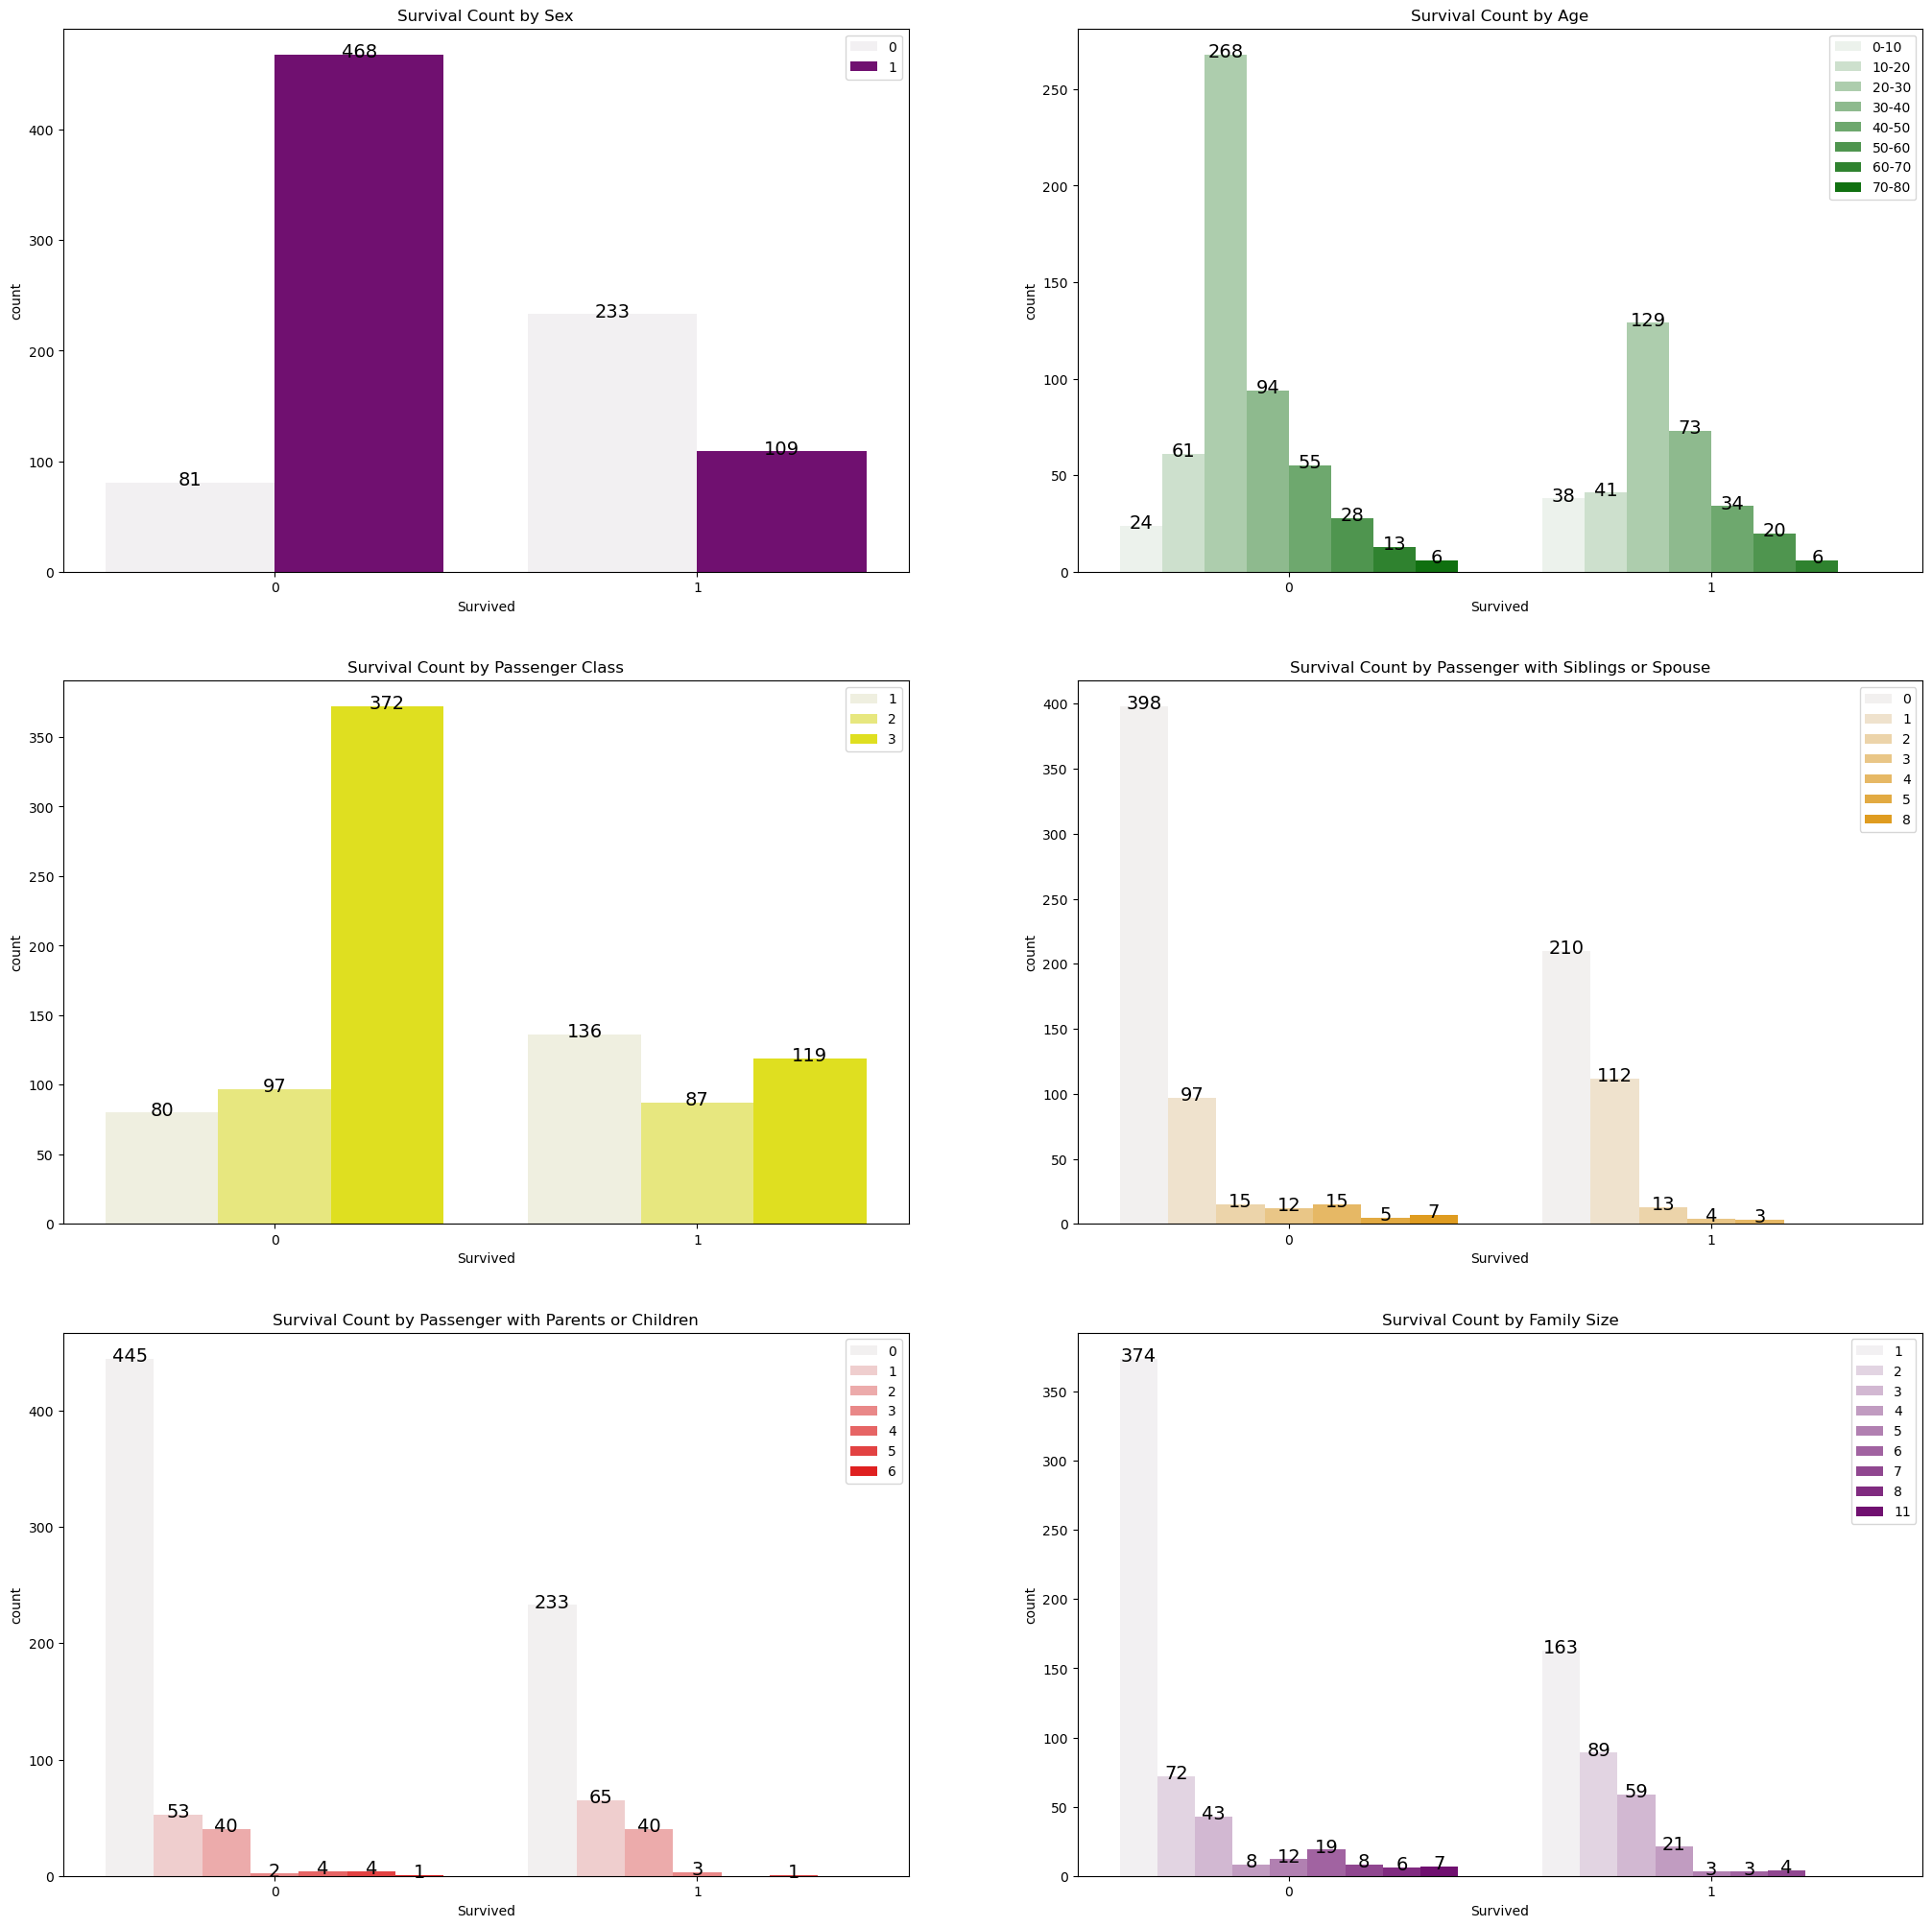

In [95]:
plt.figure(figsize=(25,25))

plt.subplot(3, 2, 1)
sns.countplot(x='Survived', hue='Sex', color="purple",data=data1)
plt.title('Survival Count by Sex')
plt.legend(loc='upper right')
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=14, color='black', xytext=(0, 10),
                        textcoords='offset points')

plt.subplot(3, 2, 2)
sns.countplot(x='Survived', hue='AgeC', color="green",data=data1)
plt.title('Survival Count by Age')
plt.legend(loc='upper right')
for p in plt.gca().patches:
    if not np.isnan(p.get_height()):
        plt.gca().annotate(f'\n{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=14, color='black', xytext=(0, 10),
                        textcoords='offset points')

plt.subplot(3, 2, 3)
sns.countplot(x='Survived', hue='Pclass', color="yellow",data=data1)
plt.title('Survival Count by Passenger Class')
plt.legend(loc='upper right')
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=14, color='black', xytext=(0, 10),
                        textcoords='offset points')

plt.subplot(3, 2, 4)
sns.countplot(x='Survived', hue='SibSp', color="orange",data=data1)
plt.title('Survival Count by Passenger with Siblings or Spouse')
plt.legend(loc='upper right')
for p in plt.gca().patches:
    if not np.isnan(p.get_height()):
        plt.gca().annotate(f'\n{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=14, color='black', xytext=(0, 10),
                        textcoords='offset points')

plt.subplot(3, 2, 5)
sns.countplot(x='Survived', hue='Parch', color="red",data=data1)
plt.title('Survival Count by Passenger with Parents or Children')
plt.legend(loc='upper right')
for p in plt.gca().patches:
    if not np.isnan(p.get_height()):
        plt.gca().annotate(f'\n{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=14, color='black', xytext=(0, 10),
                        textcoords='offset points')

plt.subplot(3, 2, 6)
sns.countplot(x='Survived', hue='Family', color="purple",data=data1)
plt.title('Survival Count by Family Size')
plt.legend(loc='upper right')
for p in plt.gca().patches:
    if not np.isnan(p.get_height()):
        plt.gca().annotate(f'\n{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=14, color='black', xytext=(0, 10),
                        textcoords='offset points')
        

plt.show()

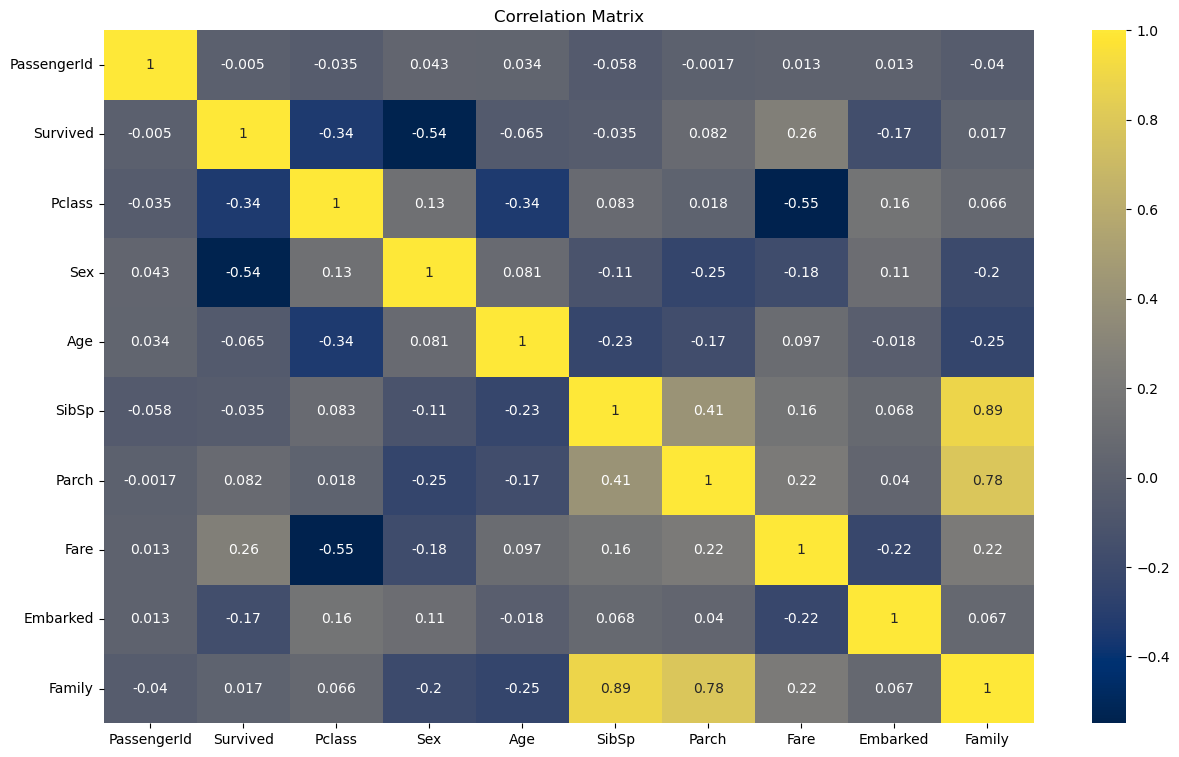

In [104]:
fig,ax=plt.subplots(1,1,figsize=(15,9))
corr_matrix = data1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='cividis')
plt.title('Correlation Matrix')
plt.show()

In [111]:
X = data1.drop(['Survived','AgeC'], axis=1)
y = data1['Survived']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\madhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7988826815642458


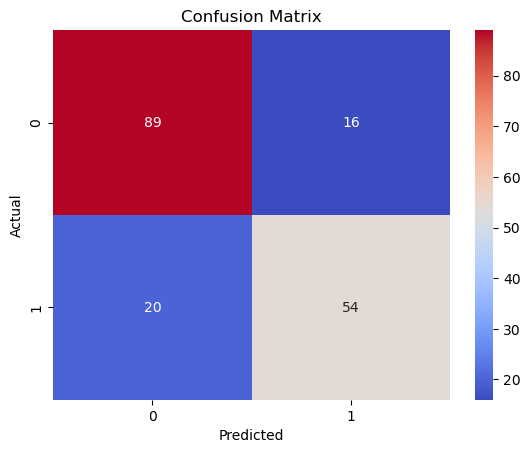

In [113]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

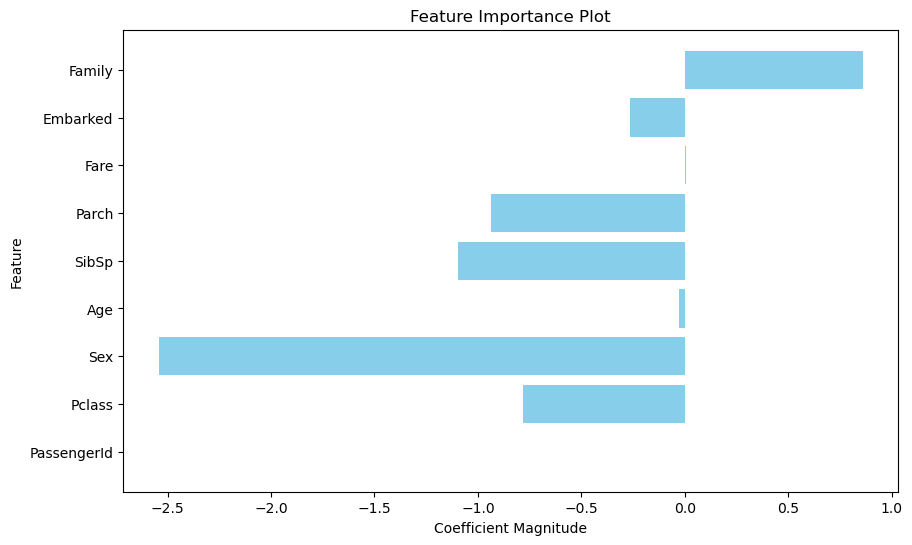

In [114]:
coefficients = logreg.coef_[0]
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()